# **Homework 1 : basic drawing**

<font face="TimesNewRoman" size = 5> Student ID : *********  <br>
Name : Yi-Kai Lee </font>

<font color=#D36010 size = 4>**Goal**</font> ： In order to learn the basic drawing and command in Pyhton, we are going to draw 11 different function(just like <A HREF=https://ntpuccw.blog/python-in-learning/lesson-2-start-with-function-computing-and-graphing/>this website</A>  showing). We will have a deeper understanding of the characteristics of each function. For example, knowing the local extrema and(or) global extrema, whether the function pass through $y=0$(that is, whether $f(x)=0$ has real roots), whether there are asymptotic lines, and the range of the function...

## import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Ex0
define 2 functions : <br>
* a function of drawing(only plot for a single function) <br>
* a function that separates (2*2) subgraphs <br>

In [2]:
# def draw function
def drawpic(x_fun, y_fun, title=None):
    # plot
    plt.figure(figsize=(15, 10))
    plt.grid(True)
    plt.plot(x_fun, y_fun, color="deepskyblue", linewidth=3)

    # custom show
    plt.tick_params(labelsize=15)
    plt.xlabel('X', fontsize=20)
    plt.ylabel('Y', fontsize=20)
    plt.title(title, fontsize=30)

In [3]:
# def subplot function
def subplot_func(ax, x, y, color, label):
    ax.plot(x, y, color=color, linewidth=3, label=label)
    ax.grid(True)
    ax.tick_params(labelsize=15)
    ax.set_xlabel('X', fontsize=20)
    ax.set_ylabel('Y', fontsize=20)
    ax.set_title(f'{label}', fontsize=20)
    ax.legend(fontsize=15)

### Ex0 Discussion
This part was originally written just to make it more convenient to generate images. <br>
However, after several rounds of image optimization, <br>
these functions are no longer sufficient to capture the unique features of each image. <br>
As a result, it has been used less frequently in the later stages. <br>


## Ex1
$f(x) = \cfrac{\sin(x)}{x}, \ -3 \pi \leq x \leq 3 \pi$, and from the graph, estimate $\mathop{\lim}\limits_{x \rightarrow 0} f(x) =\ ?$ <br>
Next, introduce the second and third functions $g(x) = \cfrac{\sin(x^2)}{x}, \ h(x) = \cfrac{\sin^2(2x)}{x^2}$ <br>
Also, estimate $\mathop{\lim}\limits_{x \rightarrow 0} g(x) =\ ?, \ \mathop{\lim}\limits_{x \rightarrow 0} h(x) =\ ?$


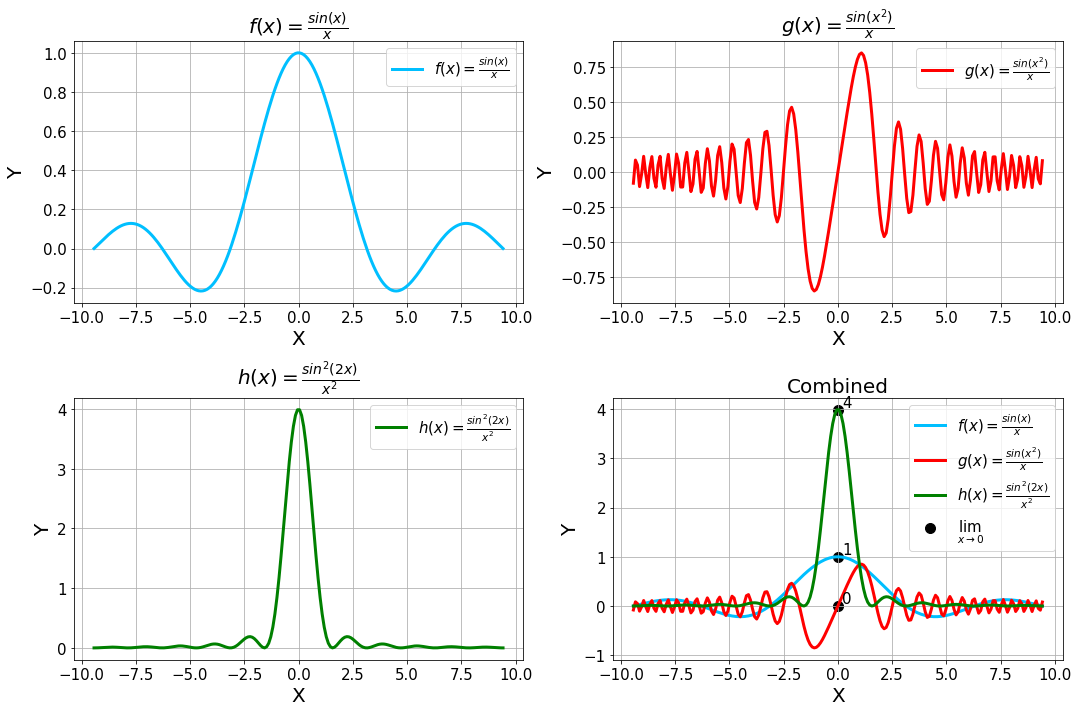

In [4]:
# set 2*2 subplot
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# set function
x = np.linspace(-3 * np.pi, 3 * np.pi, 200)
y = np.sin(x) / x
y1 = np.sin(x**2) / x
y2 = (np.sin(2 * x))**2 / (x**2)

# separate plot
subplot_func(axs[0, 0], x, y, "deepskyblue", r'$f(x) = \frac{sin(x)}{x}$')
subplot_func(axs[0, 1], x, y1, "red", r'$g(x) = \frac{sin(x^2)}{x}$')
subplot_func(axs[1, 0], x, y2, "g", r'$h(x) = \frac{sin^2(2x)}{x^2}$')

# caculate y when x->0
origin = 0
points = [np.interp(origin, x, y), np.interp(
    origin, x, y1), np.interp(origin, x, y2)]

# combine plot
axs[1, 1].plot(x, y, color="deepskyblue", linewidth=3,
               label=r'$f(x) = \frac{sin(x)}{x}$')
axs[1, 1].plot(x, y1, color="red", linewidth=3,
               label=r'$g(x) = \frac{sin(x^2)}{x}$')
axs[1, 1].plot(x, y2, color="g", linewidth=3,
               label=r'$h(x) = \frac{sin^2(2x)}{x^2}$')
axs[1, 1].grid(True)
axs[1, 1].scatter([origin, origin, origin], points, color='black',
                  marker='o', s=100, label=r'$\lim_{x \rightarrow 0}$')

# point
for i, txt in enumerate(points):
    axs[1, 1].text(origin+0.2, txt, f'{txt:.0f}',
                   fontsize=15, ha='left', va='bottom')
axs[1, 1].grid(True)
axs[1, 1].tick_params(labelsize=15)
axs[1, 1].set_xlabel('X', fontsize=20)
axs[1, 1].set_ylabel('Y', fontsize=20)
axs[1, 1].set_title('Combined', fontsize=20)
axs[1, 1].legend(fontsize=15)

# show
plt.tight_layout()
plt.show()

## Ex2
$f(x) = \frac{e^{\alpha x}}{e^{\alpha x} + 1}, \ \alpha = 1$ <br>
And draw the asymptotic line and the climbing trend of the function. <br>

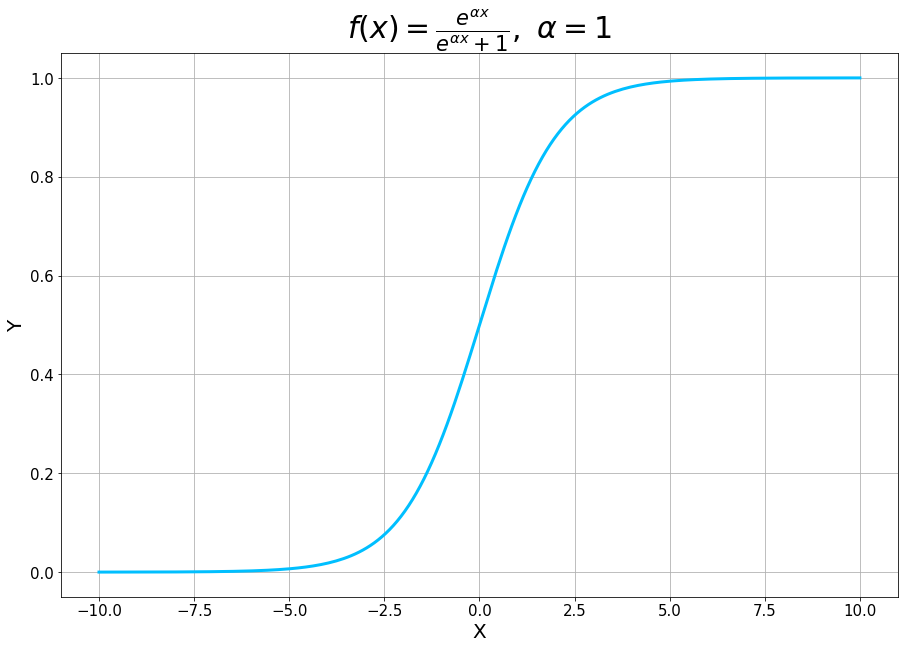

In [4]:
# ex2
# set function
alpha = 1
x = np.linspace(-10, 10, 200)
y = (np.exp(alpha * x))/(np.exp(alpha * x)+1)

# set title
sec_title = r"$f(x) = \frac{e^{\alpha x}}{e^{\alpha x} + 1}, \ \alpha = 1$"

# show
drawpic(x, y, sec_title)
plt.show()

### Ex2 Discussion
The asymptote of this function is that when $x$ increases, it approaches $1$, and when $x$ decreases, it approaches $0$. <br>
<br>
In addition, this function is very similar to the **sigmoid function** (or **logistic regression**) used in machine learning. <br>
This function can limit the feedback function value between 0~1. <br>
But in my impression, it seems that when passing through too many neural layers, the feedback tree value will be reduced too much, resulting in gradient descent. <br>
Therefore, this function is rarely used at present. <br>
More commonly used are Relu or ELU. <br>

## Ex3
$f(x) = e^{{-x}/{10}} \cdot sin(x)$ <br>
Draw a trend in which the amplitude of the shock gradually becomes smaller. <br>

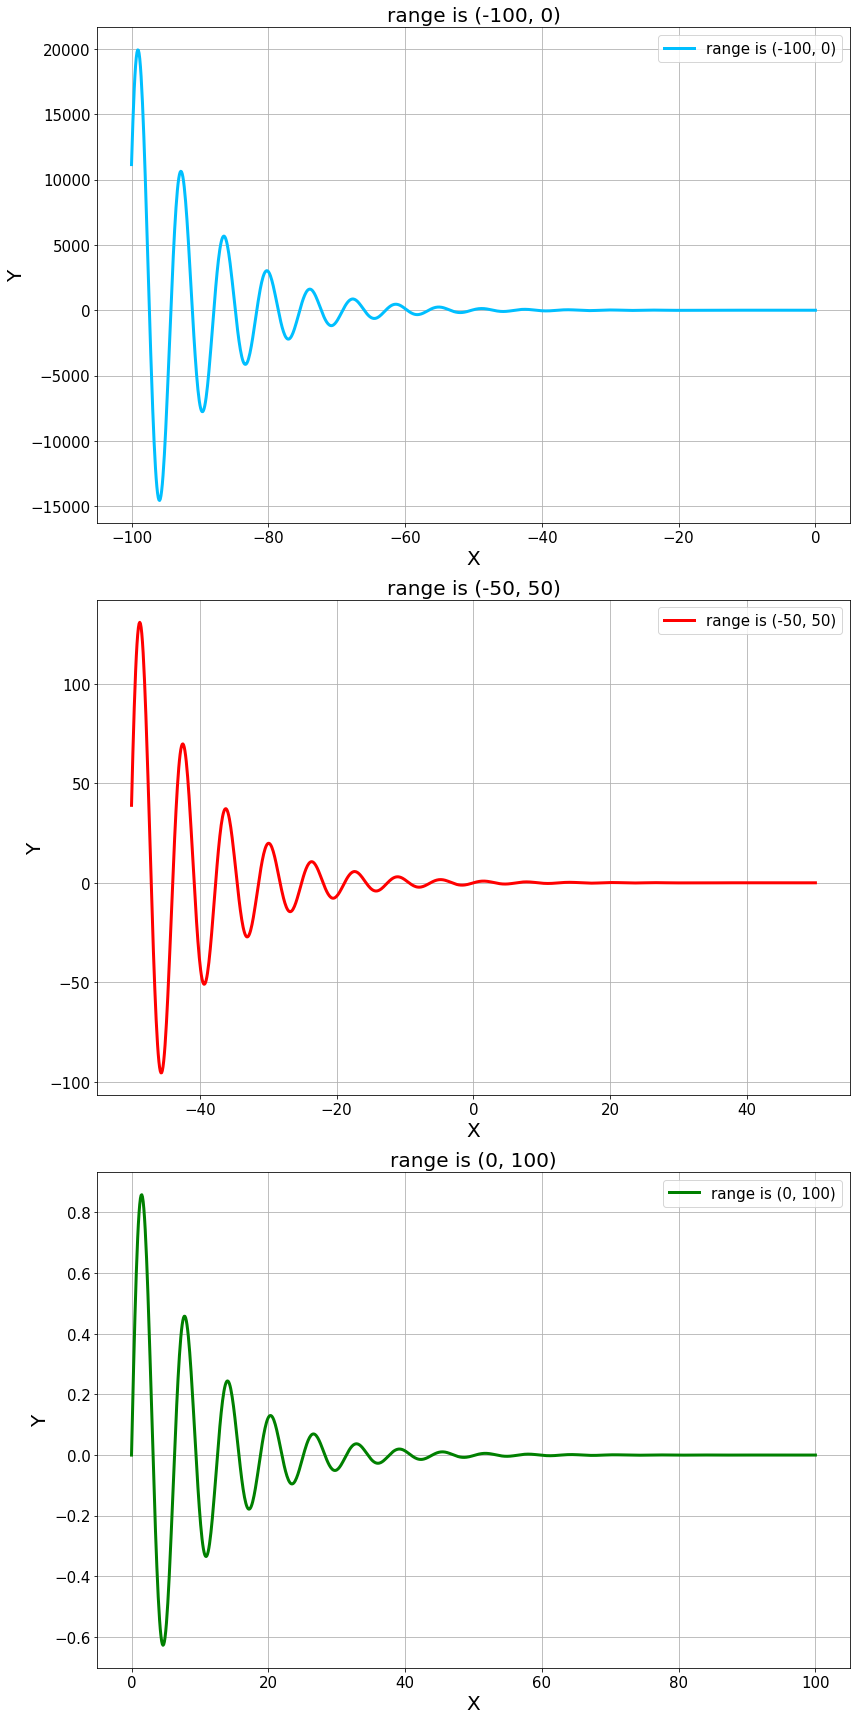

In [13]:
# ex3
# set 3*1 subplot
fig, axs = plt.subplots(3, 1, figsize=(12, 24))

# adjust some setting
ranges = [(-100, 0), (-50, 50), (0, 100)]
colors = ["deepskyblue", "red", "g"]

# plot
for i, (x_range, color) in enumerate(zip(ranges, colors)):
    x = np.linspace(x_range[0], x_range[1], 1000)
    y = (np.exp((-x)/10)) * np.sin(x)
    subplot_func(axs[i], x, y, color, f'range is {x_range}')

# show
plt.tight_layout()
plt.show()

### Ex3 Discussion
We can find from the picture that no matter what the value of range is, as long as the difference between range is the same, the oscillation wave type generated by the picture will be the same, only the y value will be different. <br>
In other words, we can take any short segment out of this wave, and the short segment taken out is also the same wave type. <br>
**Note**: When the $x$ we take increases, the fluctuation range of the $y$ value will become smaller. <br>

## Ex4
$f(x) = \cfrac{1}{x - 2}$ <br>
Draw the tendency of the asymptotic lines <br>
<em>Note: A warning may be triggered when the denominator is $0$, which can be avoided when setting the range of the x-axis</em> <br>
<em>eg. <code>np.setdiffid(np.linspace(-5, 5, 200), [0])</code></em>

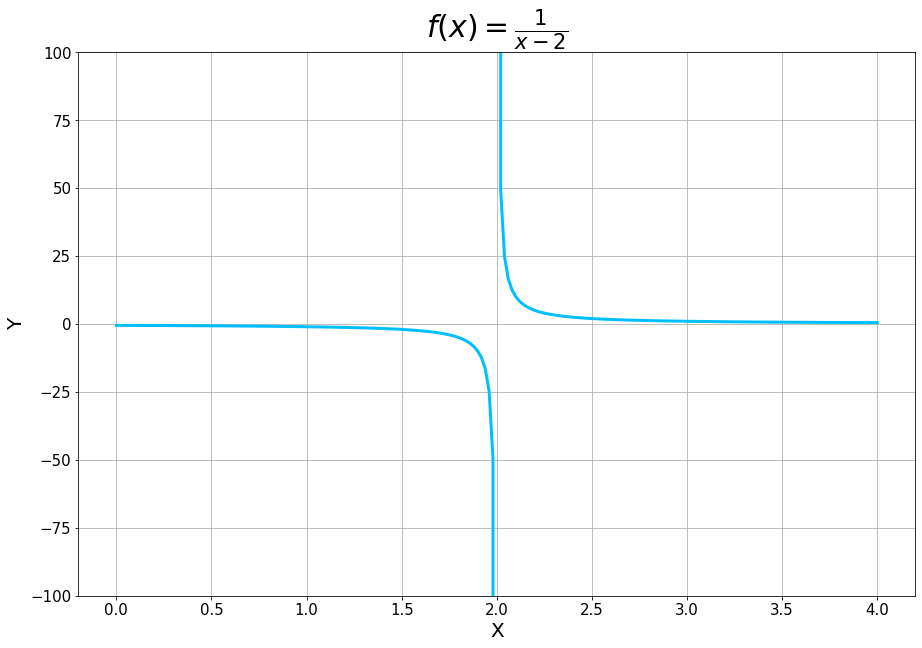

In [21]:
# ex4
# set function
x = np.linspace(0, 1.99999, 100)
x1 = np.linspace(2.00001, 4, 100)
y = 1/(x-2)
y1 = 1/(x1-2)

# set title
four_title = r"$f(x) = \frac{1}{x - 2}$"

# plot
plt.figure(figsize=(15, 10))
plt.grid(True)
plt.plot(x, y, color="deepskyblue", linewidth=3)
plt.plot(x1, y1, color="deepskyblue", linewidth=3)

# adjust plot
plt.tick_params(labelsize=15)
plt.xlabel('X', fontsize=20)
plt.ylabel('Y', fontsize=20)
plt.title(four_title, fontsize=30)
plt.ylim(-100, 100)

# show
plt.show()

### Ex4 Discussion
If we delete the part where the denominator is 0 in the above equation code, there will be no error <br>
The reason is that python uses binary arithmetic when calculating (as long as it is a computer calculation) <br>
Therefore, a lot of decimal points are generated (eg. For example, 3/2 should be equal to 1.5, but the calculated result may be 1.499999 or something like that) <br>
So when we took the point, we just missed the point where the denominator becomes 0 <hr>
But because of this, there will be an extra vertical line in the middle<br>
Therefore, use sneak steps to avoid this situation

## Ex5
$f(x) = x^3 + 2$ <br>
繪製 $f(x)$ 與 $f^{-1}(x)$ 在同一張圖上並展示其互為反函數的對稱性

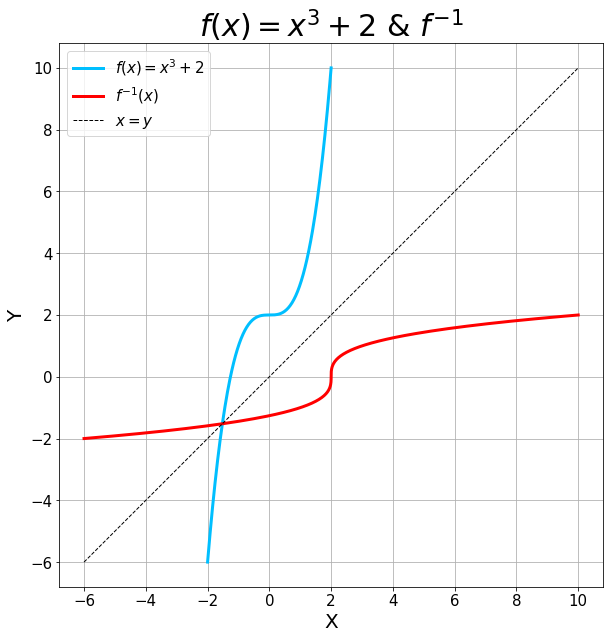

In [23]:
# ex5
import numpy as np
import matplotlib.pyplot as plt
# f(x)
x = np.linspace(-2, 2, 200)
y = x**3 + 2

# f^-1(x)
x_inv = y
y_inv = x

# x = y
z = np.linspace(-6, 10, 200)

# plot
plt.figure(figsize=(15, 10))
ax = plt.gca()    # prepare ax
ax.set_aspect(1)    # square
plt.plot(x, y, color="deepskyblue", linewidth=3, label=r'$f(x) = x^3 + 2$')
plt.plot(x_inv, y_inv, color="red", linewidth=3, label=r'$f^{-1}(x)$')
plt.plot(z, z, color="black", linewidth=1, label=r'$x = y$',linestyle='--')

# show
plt.grid(True)
plt.tick_params(labelsize=15)
plt.xlabel('X', fontsize=20)
plt.ylabel('Y', fontsize=20)
plt.title(r"$f(x) = x^3 + 2 \ & \ f^{-1}$", fontsize=30)
plt.legend(fontsize=15)
plt.show()

### Ex5 討論
我們可以根據定理知道 $f(x)$ 和 $f^{-1}(x)$ 的關聯就是對稱於 $x=y$ 這條線 <br>
所以我的程式碼直接假設 $x_{inv} =y$，$y_{inv} =x$

## Ex6
$f(x) = \cfrac{1}{\sqrt{2 \pi}} e^{-{(x-3)^2}/{2}}$ <br>
畫出這張知名圖形的特色

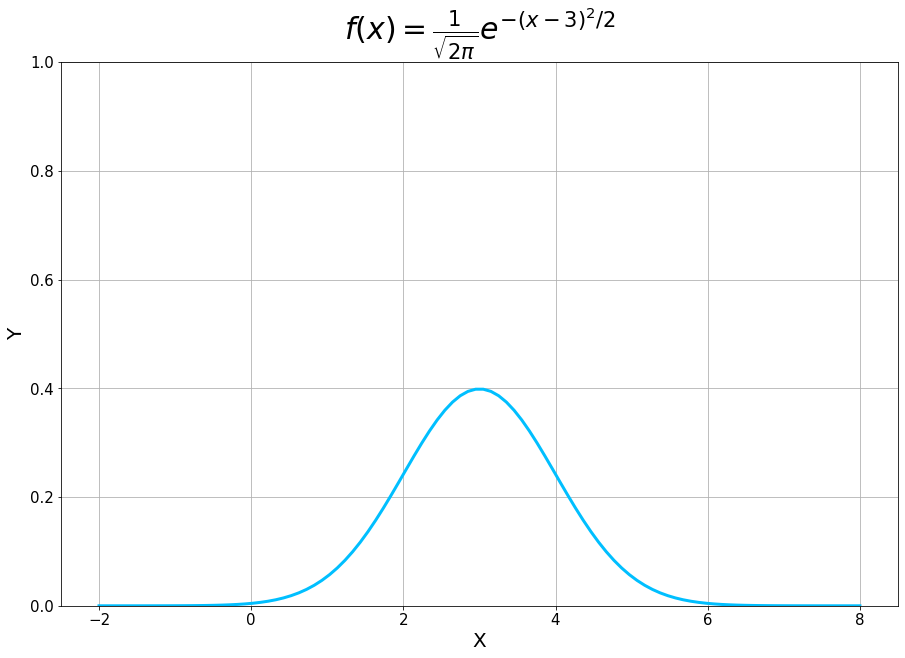

In [8]:
# ex6
import numpy as np
import matplotlib.pyplot as plt
# function
x = np.linspace(-2, 8, 100)
y = (1/np.sqrt(2*np.pi))*np.exp((-(x-3)**2)/2)

# title
six_title = r"$f(x) = \frac{1}{\sqrt{2 \pi}} e^{-{(x-3)^2}/{2}}$"

# show
plt.figure(figsize=(15, 10))
plt.grid(True)
plt.plot(x, y, color="deepskyblue", linewidth=3)
plt.ylim(0,1)

# custom show
plt.tick_params(labelsize=15)
plt.xlabel('X', fontsize=20)
plt.ylabel('Y', fontsize=20)
plt.title(six_title, fontsize=30)
plt.show()
# seems like normal distribution

### Ex6
這個圖近似於常態分佈曲線，並且是以 $3$ 為平均點

## Ex7
$f(x) = 3x^3 - x^4$ , <br>
透過 X 軸範圍的選擇，觀察函數是否有最大值，並且是否看得出函數有幾個實數根

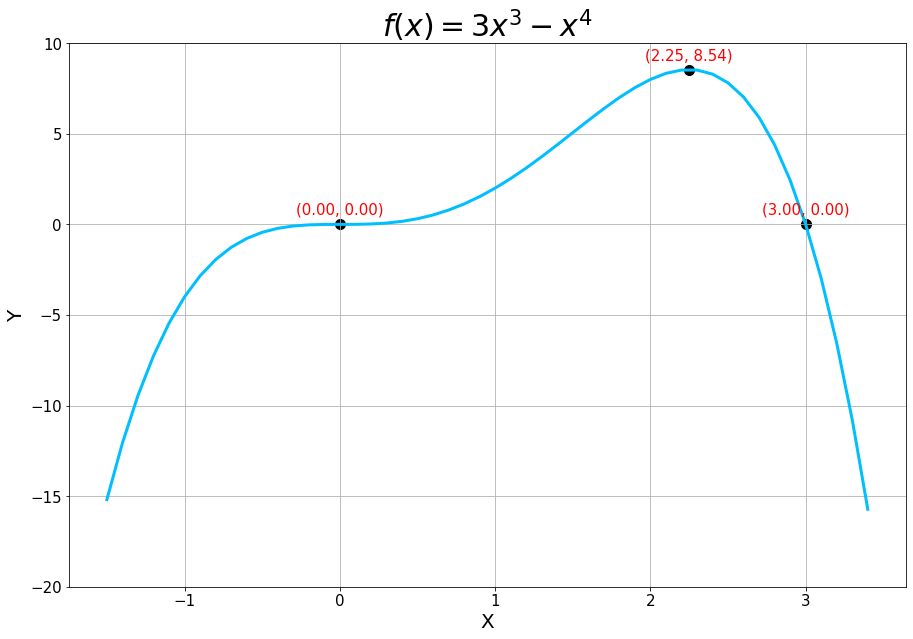

In [4]:
# ex7
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
# save val
maxval = []
rootval = []
y_maxval = []

# function
x = np.arange(-1.5, 3.5, 0.1)
def f(x):
    return 3*(x**3) - x**4
y = f(x)

# find max
# -f(x) in order to find maxium
xmax_local = optimize.fminbound(lambda x: -f(x), 0, 5)
maxval.append(round(xmax_local, 2))

# use <optimize.root> find root
step = np.arange(-2, 6, 0.01)
for initial_guess in step:
    initial_guess = round(initial_guess, 2)
    root_result = optimize.root(f, initial_guess)
    if root_result.success:
        root_value = root_result.x[0]
        rootval.append(round(root_value, 2))

# del same
rootval = list(set(rootval))

# find y_maxval
y_maxval.append(f(maxval[0]))

# title
sev_title = r"$f(x) = 3x^3 - x^4$"

# plot
plt.figure(figsize=(15, 10))
plt.grid(True)
plt.plot(x, y, color="deepskyblue", linewidth=3)

# point
origin = 0
points_y = [0, 0, y_maxval[0]]
points_x = [rootval[0], rootval[1], maxval[0]]
plt.scatter(points_x, points_y, color='black',
            marker='o', s=100, label=r'$\lim_{x \rightarrow 0}$')

# add text
for i, (x, y) in enumerate(zip(points_x, points_y)):
    plt.annotate(f'({x:.2f}, {y:.2f})', (x, y), textcoords="offset points", xytext=(
        0, 10), ha='center', fontsize=15, color='red')

# show
plt.tick_params(labelsize=15)
plt.ylim(-20, 10)
plt.xlabel('X', fontsize=20)
plt.ylabel('Y', fontsize=20)
plt.title(sev_title, fontsize=30)
plt.show()

### Ex7 討論
圖中我已標出 **極值點** 以及 **根** <br>
以數學式來說 4 次方程式應該會出現 4 個 **根** <br>
但由於有重根的出現造成我們只能在圖上看到 2 個 **根**

## Ex8
$f(x) = \cfrac{ln(x)}{x^2}$ , <br>
圖形必須清楚地呈現出最大值的大概位置與右邊漸進線的趨勢

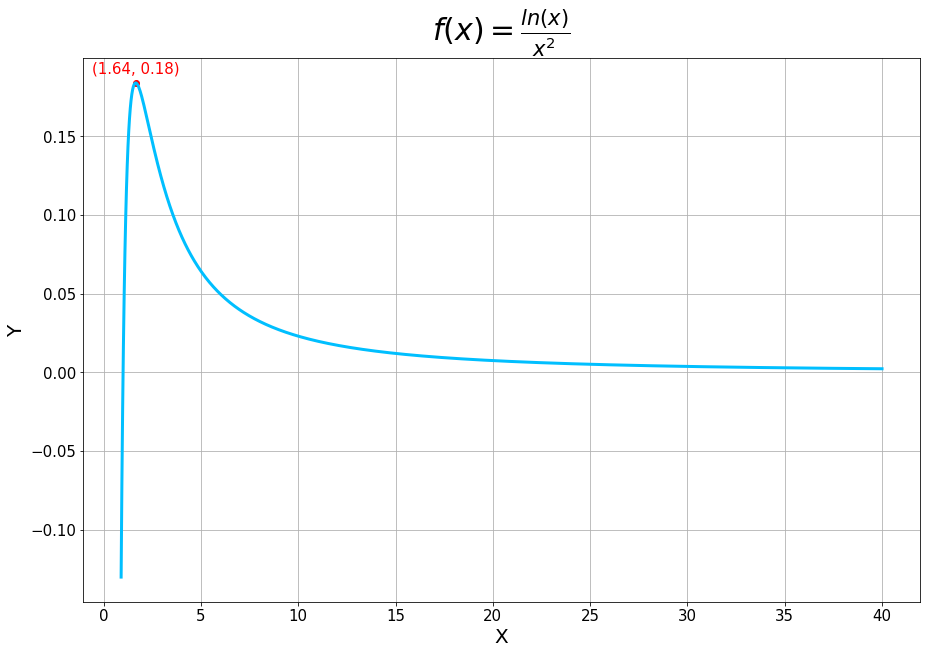

In [12]:
# ex8
import numpy as np
import matplotlib.pyplot as plt
# function
x = np.linspace(0.9, 40, 1000)
y = (np.log(x)) / x**2

# maximum
max_y = np.max(y)
max_x = x[np.argmax(y)]

# Title
eig_title = r"$f(x) = \frac{ln(x)}{x^2}$"

# plot
plt.figure(figsize=(15, 10))
plt.grid(True)
plt.plot(x, y, color="deepskyblue", linewidth=3)
plt.scatter(max_x, max_y, color='red', marker='o')
plt.annotate(f'({max_x:.2f}, {max_y:.2f})', (max_x, max_y), textcoords="offset points", xytext=(
    0, 10), ha='center', fontsize=15, color='red')

# show
plt.tick_params(labelsize=15)
plt.xlabel('X', fontsize=20)
plt.ylabel('Y', fontsize=20)
plt.title(eig_title, fontsize=30)
plt.show()

### Ex8
在圖中我已標出最大值的點 <br>
並且從圖上我們可以清楚看出漸進線是趨於 0 的

## Ex9
$f(x) = \begin{cases}
1, \ 1 \le x \le 3 \\
2, \ 3 \le x \le 5 \\
3, \ 5 \le x \le 7
\end{cases}$

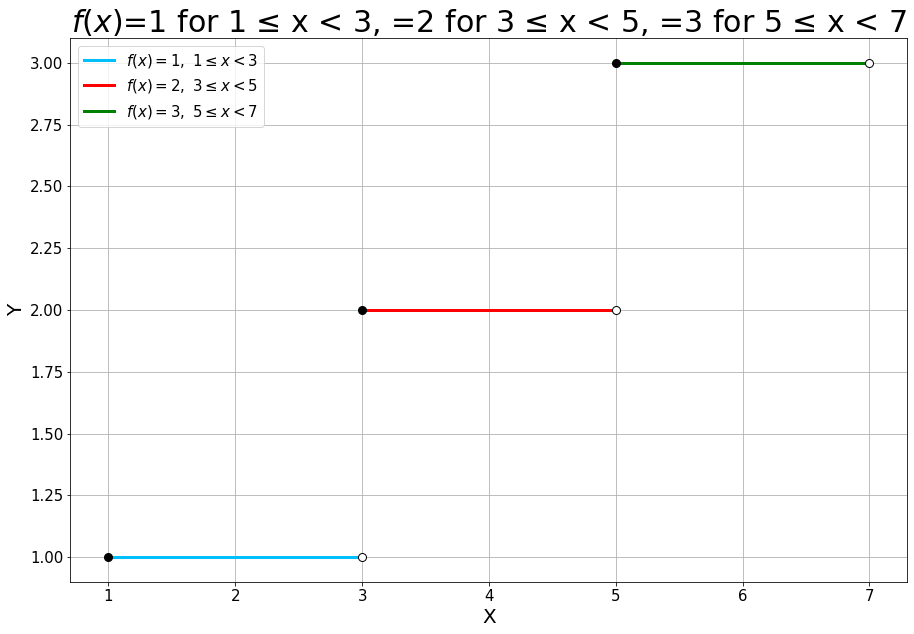

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# function segments
segments = [(1, 3, 1, 'deepskyblue', r'$f(x) = 1, \ 1 \leq x < 3$'),
            (3, 5, 2, 'red', r'$f(x) = 2, \ 3 \leq x < 5$'),
            (5, 7, 3, 'g', r'$f(x) = 3, \ 5 \leq x < 7$')]

# Plot
plt.figure(figsize=(15, 10))
for x_start, x_end, y_val, color, label in segments:
    x = np.linspace(x_start, x_end, 200)
    y = np.full_like(x, y_val)

    # points
    plt.plot(x, y, color=color, linewidth=3, label=label)
    plt.plot(x_start, y_val, marker='o', markersize=8,
             color='black', markerfacecolor='black')
    plt.plot(x_end, y_val, marker='o', markersize=8,
             color='black', markerfacecolor='white')

# Show
plt.grid(True)
plt.tick_params(labelsize=15)
plt.xlabel('X', fontsize=20)
plt.ylabel('Y', fontsize=20)
plt.title(r"$f(x) $" + ', '.join(
    [f"={y_val} for {x_start} ≤ x < {x_end}" for x_start, x_end, y_val, _, _ in segments]), fontsize=30)
plt.legend(fontsize=15)
plt.show()

### Ex9 討論
我想這應該只是需要注意哪些點是空心哪些是實心的

## Ex10
$x^2 + y^2 = 1$ <br>
畫此圓可以有這 3 種方法 : <br>
<ul style='list-style-position:outside;'>
<li>method_1 : 將變數 x &amp y 表示為另一個變數 $\theta$ 的函數 <br> ig. <code>x = sin(theta), y = cos(theta)</code>, $0 \le \theta \le 2 \pi$
<li>method_2 : 將圓形方程式當作隱函數(implicit function)，但必須找到適當的指令
<li>method_3 : 到 matplotlib 套件的手冊尋找是否有畫圓的指令
</ul>
<br>
<strong>最後須把座標軸設定成等寬才會看起來比較圓</strong> <br>
可以透過指令 <code>ax.set_aspect(1)</code> 把座標區域變成方形

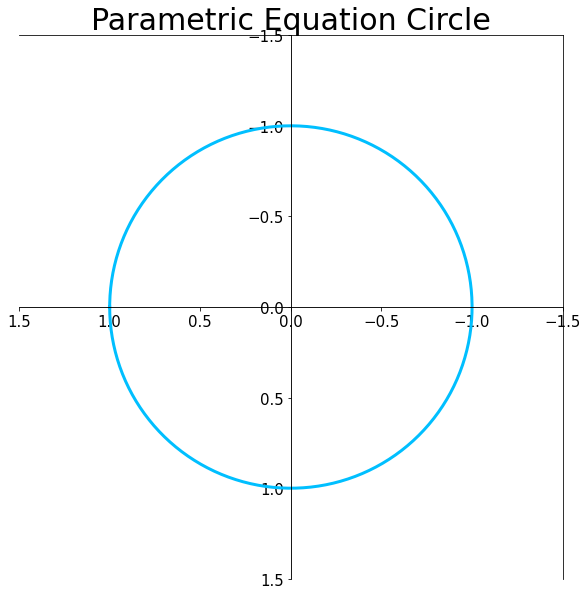

In [14]:
# ex10_method1
import matplotlib.pyplot as plt
import numpy as np
# circle
theta = np.linspace(0, np.pi * 2, 300)
x = np.cos(theta)
y = np.sin(theta)

# plot
plt.figure(figsize=(15, 10))
ax = plt.gca()    # prepare ax
ax.set_aspect(1)    # square
plt.plot(x, y, color="deepskyblue", linewidth=3)

# set ticks
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
ax.axhline(0, color='black',linewidth=0.5)
ax.axvline(0, color='black',linewidth=0.5)
ax.spines["bottom"].set_position(("data",0))
ax.invert_xaxis()
ax.spines["left"].set_position(("data",0))
ax.invert_yaxis()

# show
plt.tick_params(labelsize=15)
plt.title("Parametric Equation Circle", fontsize=30)
plt.show()


### Ex10_method1 討論
直接使用上方提供的想法

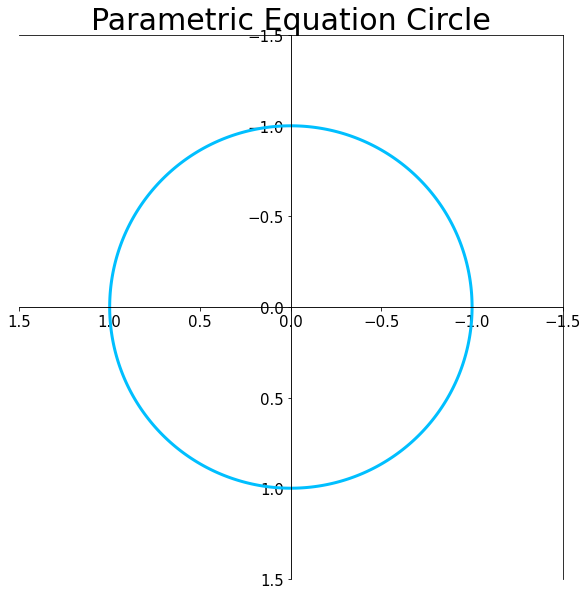

In [15]:
# ex10_method2
import matplotlib.pyplot as plt
import numpy as np
# define circle
def circle_equation(x, y, h, k, r):
    return (x - h)**2 + (y - k)**2 - r**2

center_x = 0
center_y = 0
radius = 1

# give x, y, z
x = np.linspace(center_x - radius - 1, center_x + radius + 1, 400)
y = np.linspace(center_y - radius - 1, center_y + radius + 1, 400)
X, Y = np.meshgrid(x, y)
Z = circle_equation(X, Y, center_x, center_y, radius)

# plot
plt.figure(figsize=(15, 10))
ax = plt.gca()    # prepare ax
ax.set_aspect(1)    # square
contour = ax.contour(X, Y, Z, levels=[0], colors="deepskyblue", linewidths=3)

# set ticks
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.spines["bottom"].set_position(("data", 0))
ax.invert_xaxis()
ax.spines["left"].set_position(("data", 0))
ax.invert_yaxis()

# show
plt.tick_params(labelsize=15)
plt.title("Parametric Equation Circle", fontsize=30)
plt.show()

### Ex10_method2 討論
來自數學定義(不太確定甚麼是隱含數)(大約一半來自 chatgpt 提供--contour 的部分是新知識!)

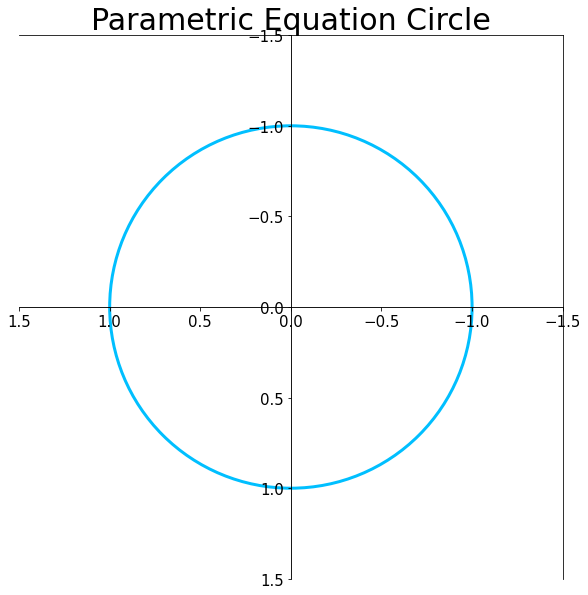

In [23]:
# ex10_method3
import matplotlib.pyplot as plt
# circle
circle = plt.Circle((0, 0), 1, fill=False, color="deepskyblue", linewidth=3)

# plot
plt.figure(figsize=(15, 10))
ax = plt.gca()    # prepare ax
ax.set_aspect(1)    # square
ax.add_patch(circle)

# set ticks
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
ax.axhline(0, color='black',linewidth=0.5)
ax.axvline(0, color='black',linewidth=0.5)
ax.spines["bottom"].set_position(("data",0))
ax.invert_xaxis()
ax.spines["left"].set_position(("data",0))
ax.invert_yaxis()

# show
plt.tick_params(labelsize=15)
plt.title("Parametric Equation Circle", fontsize=30)
plt.show()

### Ex10_method3 討論
直接使用套件(來自 chatgpt 提供)

## Ex11
繪製正方形(經過 x 以及 y 軸的 $\pm 0.5$) <br>
可以展現多種繪圖方式

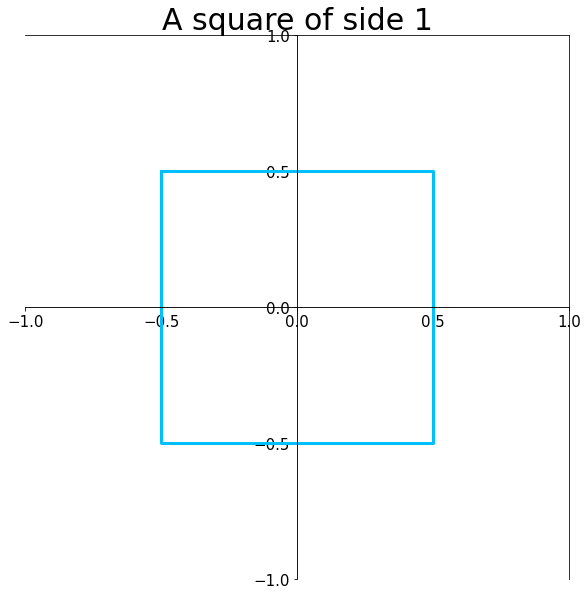

In [17]:
# ex11_method1
import matplotlib.pyplot as plt
# for convenient computing
a = 0.5
b = -0.5

# 4 vertex(to close the square so the first is the same as the last)
x = [b, a, a, b, b]
y = [a, a, b, b, a]

# plot
plt.figure(figsize=(15, 10))
ax = plt.gca()    # prepare ax
ax.set_aspect(1)    # square
plt.plot(x, y, color="deepskyblue", linewidth=3)

# set ticks
plt.xlim(-1, 1)
plt.ylim(-1, 1)
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.spines["bottom"].set_position(("data", 0))
ax.spines["left"].set_position(("data", 0))
plt.xticks([-1, -0.5, 0, 0.5, 1], fontsize=15)
plt.yticks([-1, -0.5, 0, 0.5, 1], fontsize=15)
plt.tick_params(labelsize=15)

# show
plt.title("A square of side 1", fontsize=30)
plt.show()

### Ex11_method1 討論
直接定義點，就畫出來了，只要注意開頭的點需要寫 2 次讓整個圖形閉合

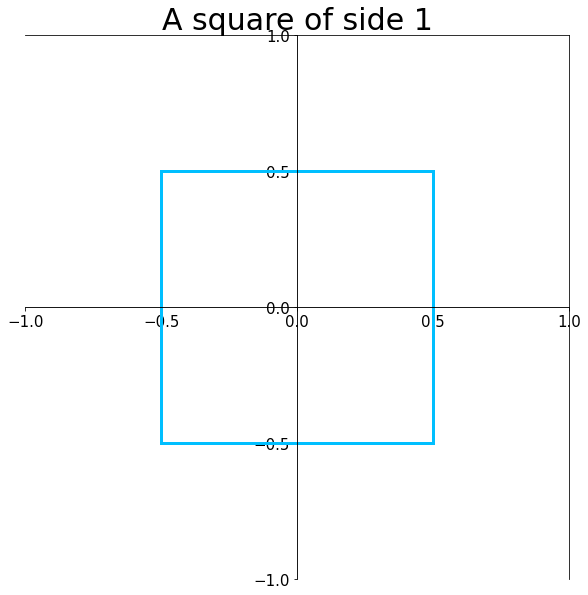

In [18]:
# ex11_method2
import matplotlib.pyplot as plt
import numpy as np

# plot points for each
u = np.linspace(-0.5, 0.5, 100)
a = np.full_like(u, 0.5)
b = np.full_like(u, -0.5)

# plot
plt.figure(figsize=(15, 10))
ax = plt.gca()    # prepare ax
ax.set_aspect(1)    # square
plt.plot(a, u, color=("deepskyblue"), linewidth=3)
plt.plot(b, u, color=("deepskyblue"), linewidth=3)
plt.plot(u, a, color=("deepskyblue"), linewidth=3)
plt.plot(u, b, color=("deepskyblue"), linewidth=3)

# set ticks
plt.xlim(-1, 1)
plt.ylim(-1, 1)
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.spines["bottom"].set_position(("data", 0))
ax.spines["left"].set_position(("data", 0))
plt.xticks([-1, -0.5, 0, 0.5, 1], fontsize=15)
plt.yticks([-1, -0.5, 0, 0.5, 1], fontsize=15)
plt.tick_params(labelsize=15)

# show
plt.title("A square of side 1", fontsize=30)
plt.show()

### Ex11_method2 討論
直接定義線，就畫出來了